In [29]:
gesture_type = 'two_up'

In [30]:
import json 
import os

img_SOURCE = f"./../datasets/HaGRID/{gesture_type}/"
all_images_of_given_gesture = [f for f in os.listdir(os.path.join(img_SOURCE)) if f.endswith('.jpg')]
all_images_of_given_gesture_set = set(os.path.splitext(f)[0] for f in all_images_of_given_gesture)

print("All Images")
print(len(all_images_of_given_gesture))
print(len(all_images_of_given_gesture_set))

train_labels_SOURCE = f"./../datasets/HaGRID/train/{gesture_type}.json"
test_labels_SOURCE = f"./../datasets/HaGRID/test/{gesture_type}.json"
val_labels_SOURCE = f"./../datasets/HaGRID/val/{gesture_type}.json"

train_labels = []
test_labels = []
val_labels = []

with open(train_labels_SOURCE, 'r') as f:
    data = json.load(f)
    for image_id, info in data.items():
        train_labels.append(image_id)
        
with open(test_labels_SOURCE, 'r') as f:
    data = json.load(f)
    for image_id, info in data.items():
        test_labels.append(image_id)
        
with open(val_labels_SOURCE, 'r') as f:
    data = json.load(f)
    for image_id, info in data.items():
        val_labels.append(image_id)

print("Train Labels")
train_labels_set = set(train_labels)
print(len(train_labels))
print(len(train_labels_set))
print(train_labels_set.issubset(all_images_of_given_gesture_set))

print("Test Labels")
test_labels_set = set(test_labels)
print(len(test_labels))
print(len(test_labels_set))
print(test_labels_set.issubset(all_images_of_given_gesture_set))

print("Val Labels")
val_labels_set = set(val_labels)
print(len(val_labels))
print(len(val_labels_set))
print(val_labels_set.issubset(all_images_of_given_gesture_set))

print("Labels Combined")
labels_set = train_labels_set | test_labels_set | val_labels_set
print(len(labels_set))
labels_set == all_images_of_given_gesture_set

All Images
30688
30688
Train Labels
22688
22688
True
Test Labels
5000
5000
True
Val Labels
3000
3000
True
Labels Combined
30688


True

In [39]:
set_type = 'val'

In [40]:
WEIGHTS = "./../training/runs/train/MIAP_person_detection/weights/best.pt"
SOURCE = f"./../datasets/HaGRID/{set_type}/{gesture_type}.json"

In [41]:
%run ./HaGRID_conversion_utils/detect.py --weights $WEIGHTS --conf-thres 0.317 \
--device '0' --img-size 640 --source $SOURCE

INFO:utils.torch_utils:YOLOR 🚀 893edf6 torch 2.3.0+cu121 CUDA:0 (NVIDIA A100 80GB PCIe, 81221.8125MB)

INFO:utils.torch_utils:Model Summary: 208 layers, 6007596 parameters, 0 gradients, 13.0 GFLOPS


Fusing layers... 
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

found 3000 image IDs in ./../datasets/HaGRID/val/two_up.json
ended up with 3000 IDs after converting to a set
list image path length = 3000


3000it [02:32, 19.61it/s]


In [42]:
import os

# Define the directories
images_dir = f'./../datasets/HaGRID_converted/images/{set_type}'
labels_dir = f'./../datasets/HaGRID_converted/labels/{set_type}'

# Get the list of filenames (without extensions) in both directories
image_filenames = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}
label_filenames = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}

# Find mismatches
missing_in_labels = image_filenames - label_filenames
missing_in_images = label_filenames - image_filenames

# Print results
if not missing_in_labels and not missing_in_images:
    print("All filenames match!")
else:
    if missing_in_labels:
        print("Images without labels:", missing_in_labels)
    if missing_in_images:
        print("Labels without images:", missing_in_images)

print(len(image_filenames))
set(image_filenames) == set(label_filenames)

All filenames match!
12000


True

In [44]:
from os import listdir
from os.path import abspath, join, isdir, isfile

path = f"./../datasets/HaGRID_converted/"
print("The HaGRID_converted dataset is located in " + abspath(path) + ". Directory content:\n")

content = sorted(listdir(path))
directories = [directory for directory in content if isdir(join(path, directory))]

for directory in directories:
    if not directory.startswith('.'):
        print(directory)
        subcontent = sorted(listdir(join(path, directory)))
        for file in subcontent:
            subdirectory_path = join(path, directory, file)
            if isdir(subdirectory_path):
                num_files = len([f for f in listdir(subdirectory_path) if isfile(join(subdirectory_path, f))])
                print('├──' + file + f"    <-- contains {num_files} files") if not file.startswith('.') else None

The HaGRID_converted dataset is located in /home/jovyan/datasets/HaGRID_converted. Directory content:

images
├──test    <-- contains 20000 files
├──train    <-- contains 92795 files
├──val    <-- contains 12000 files
labels
├──test    <-- contains 20000 files
├──train    <-- contains 92795 files
├──val    <-- contains 12000 files


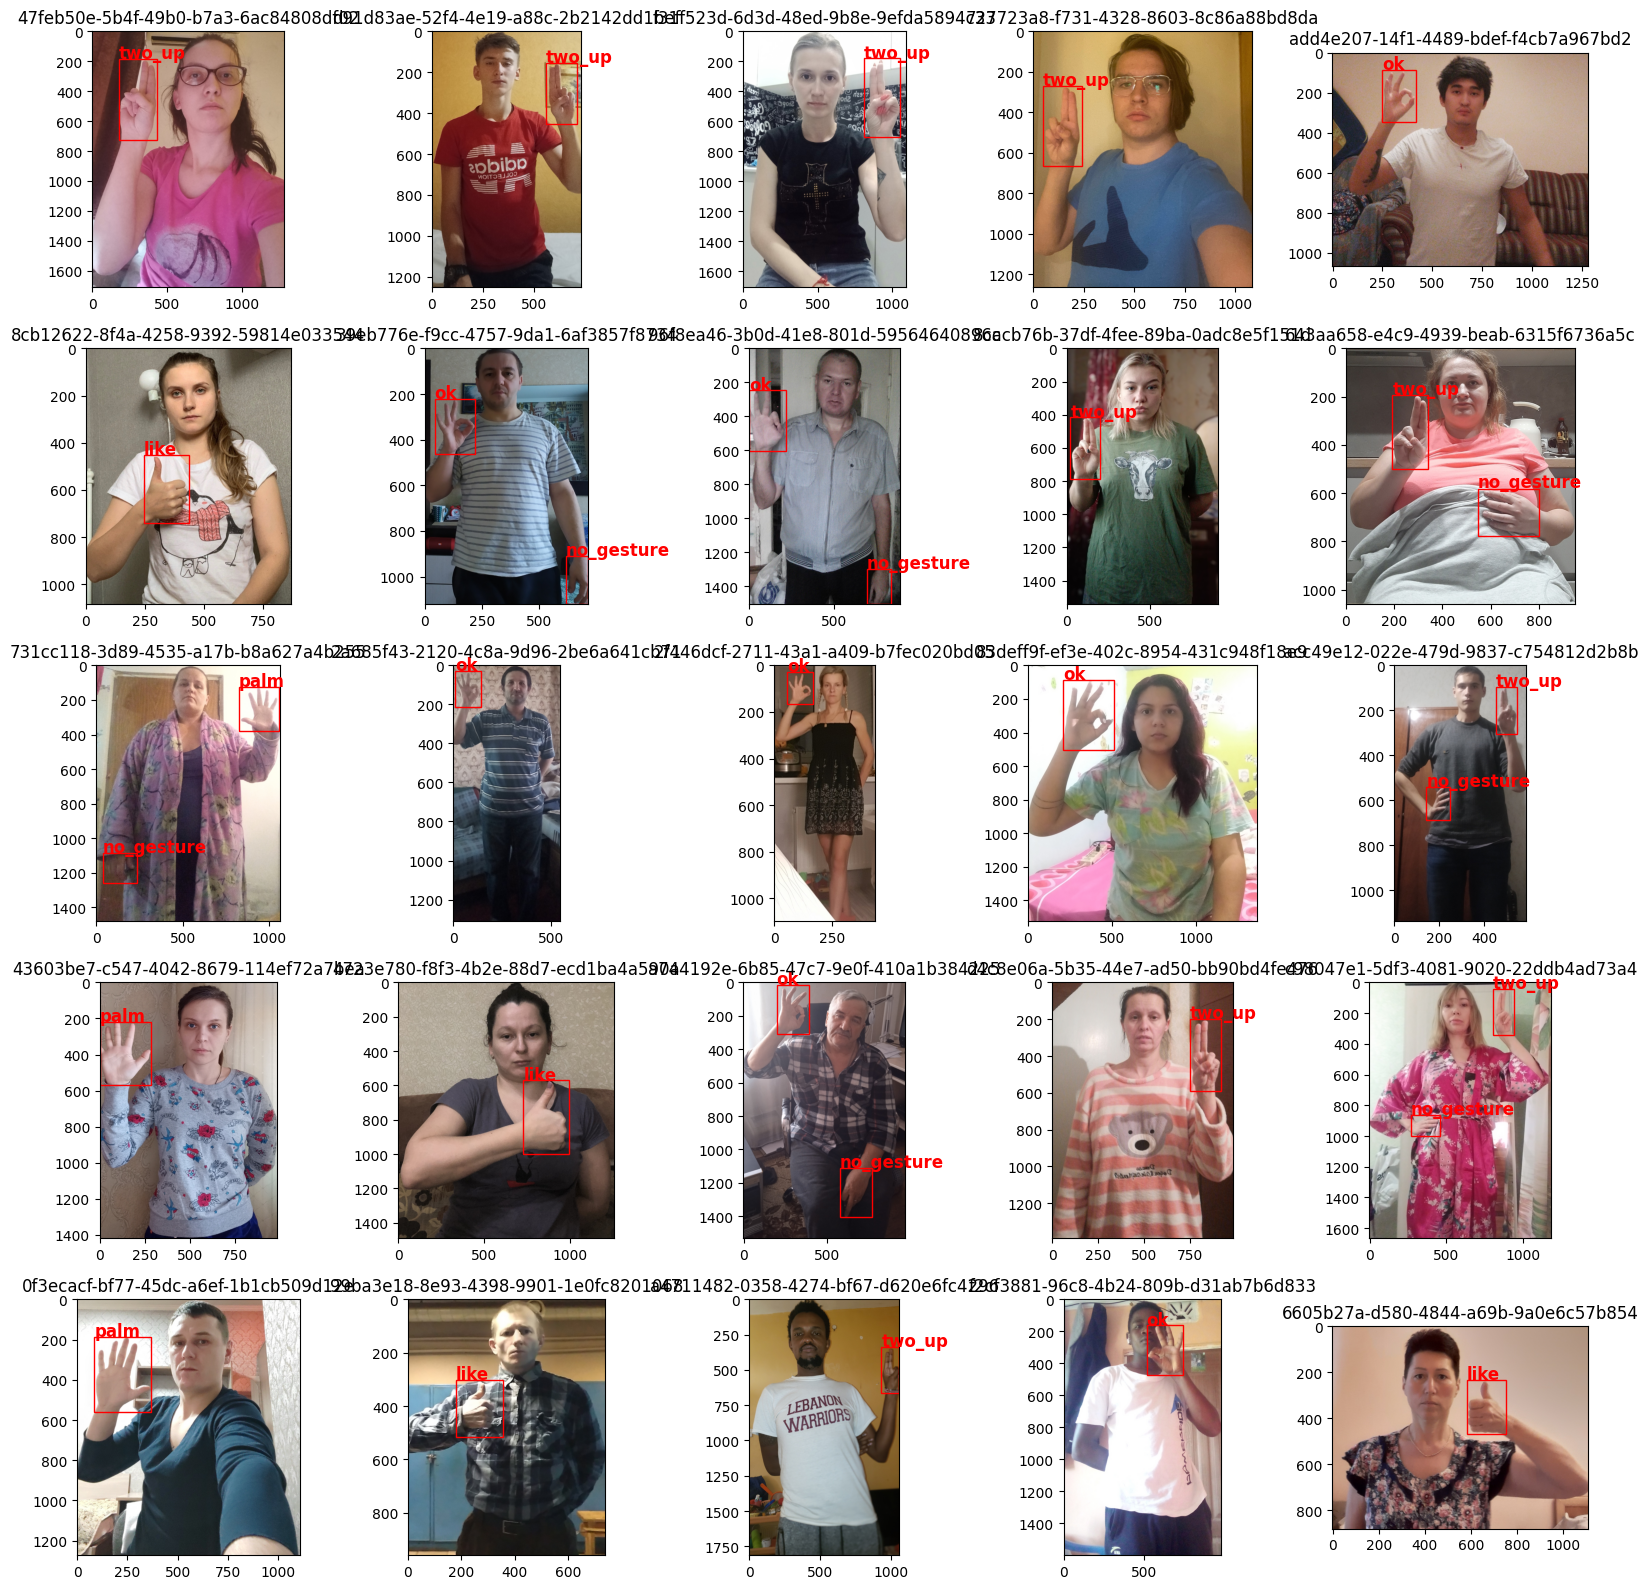

In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Set paths to the image and label directories
images_dir = f"./../datasets/HaGRID_converted/images"
labels_dir = f"./../datasets/HaGRID_converted/labels"

# Subdirectories for training and validation
train_images_dir = os.path.join(images_dir, "train")
test_images_dir = os.path.join(images_dir, "test")
val_images_dir = os.path.join(images_dir, "val")
train_labels_dir = os.path.join(labels_dir, "train")
test_labels_dir = os.path.join(labels_dir, "test")
val_labels_dir = os.path.join(labels_dir, "val")

def get_image_paths_and_labels(images_dir, labels_dir):
    image_paths = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')]
    label_paths = [os.path.join(labels_dir, f[:-4] + '.txt') for f in os.listdir(images_dir) if f.endswith('.jpg')]
    return image_paths, label_paths

# Get image paths and label paths
train_image_paths, train_label_paths = get_image_paths_and_labels(train_images_dir, train_labels_dir)
test_image_paths, test_label_paths = get_image_paths_and_labels(test_images_dir, test_labels_dir)
val_image_paths, val_label_paths = get_image_paths_and_labels(val_images_dir, val_labels_dir)

# Sample random images
random_train_images = random.sample(train_image_paths, 15)
random_test_images = random.sample(test_image_paths, 5)
random_val_images = random.sample(val_image_paths, 5)

# Combine the samples
random_images = random_train_images + random_test_images + random_val_images

# Mapping class to gesture name
label_mapping = {
    0: 'no_gesture',
    1: 'like',
    2: 'ok',
    3: 'palm',
    4: 'two_up'
}

# Create a plot with 5x5 subplots
fig, axs = plt.subplots(5, 5, figsize=(16, 16))

# Plot each image with bounding boxes
for i, ax in enumerate(axs.flatten()):
    img_path = random_images[i]
    img_id = os.path.splitext(os.path.basename(img_path))[0]
    if 'train' in img_path:
        label_dir = train_labels_dir
    elif 'test' in img_path:
        label_dir = test_labels_dir
    elif 'val' in img_path:
        label_dir = val_labels_dir
    else:
        raise ValueError("img_path must contain 'train', 'test', or 'val'.")

    label_path = os.path.join(label_dir, img_id + '.txt')

    # Load the image
    im = plt.imread(img_path)
    ax.imshow(im)

    # Get image dimensions
    img_width = im.shape[1]
    img_height = im.shape[0]

    # Load the bounding boxes
    if os.path.exists(label_path):
        img_boxes = pd.read_csv(label_path, sep=' ', header=None, names=['class', 'x_center', 'y_center', 'width', 'height'])

        # Draw bounding boxes
        for _, row in img_boxes.iterrows():
            class_, x_center, y_center, width, height = row
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            rect = patches.Rectangle(
                (x_min, y_min), width * img_width, height * img_height,
                linewidth=1, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)
            
            class_label = label_mapping.get(class_, 'unknown')
            ax.text(x_min, y_min - 5, class_label, color='red', fontsize=12, weight='bold')

    ax.set_title(img_id)

plt.tight_layout()
plt.show()
